In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralBiclustering, MeanShift

In [2]:
engine = create_engine('postgres://ubuntu@18.218.14.250:5432/roboadvisor')

In [3]:
df = pd.read_sql('SELECT * FROM risk_metrics', engine)

In [5]:
df.set_index('index')

,3 Year Alpha,5 Year Alpha,10 Year Alpha,3 Year Beta,5 Year Beta,10 Year Beta,3 Year Mean Annual Return,5 Year Mean Annual Return,10 Year Mean Annual Return,3 Year R-Squared,...,10 Year R-Squared,3 Year Standard Deviation,5 Year Standard Deviation,10 Year Standard Deviation,3 Year Sharpe Ratio,5 Year Sharpe Ratio,10 Year Sharpe Ratio,3 Year Treynor Ratio,5 Year Treynor Ratio,10 Year Treynor Ratio
index,,,,,,,,,,,,,,,,,,,,,
AAAU,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AADR,-2.31,2.55,0.00,1.21,1.03,0.00,0.88,0.48,0.00,64.11,...,0.00,17.18,15.26,0.00,0.54,0.33,0.00,6.83,3.87,0.00
AAXJ,2.80,3.18,1.48,1.10,1.06,1.05,1.22,0.54,1.04,76.96,...,80.88,14.30,14.73,18.59,0.93,0.39,0.65,12.08,4.53,10.36
ACES,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ACIM,3.19,4.35,0.00,0.87,0.86,0.00,1.07,0.60,0.00,85.20,...,0.00,10.72,11.02,0.00,1.07,0.58,0.00,13.47,7.00,0.00
ACSG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ACSI,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ACT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ACWF,2.57,0.00,0.00,0.94,0.00,0.00,1.07,0.00,0.00,82.96,...,0.00,11.72,0.00,0.00,0.98,0.00,0.00,12.40,0.00,0.00


In [6]:
cols_to_add = []

for col in df.columns:
    if col[0] == '3':
        cols_to_add.append(col)

In [8]:
df_3_year = df[cols_to_add]

In [11]:
df_3_year = df_3_year.set_index(df['index'])

In [13]:
for index, row in df_3_year.iterrows():
    if row[0] == 0 and row[1] == 0 and row[2] == 0 and row[3] == 0 and row[4] == 0 and row[5] == 0 and row[6] == 0:
        df_3_year = df_3_year.drop(index)

In [14]:
df_3_year

,3 Year Alpha,3 Year Beta,3 Year Mean Annual Return,3 Year R-Squared,3 Year Standard Deviation,3 Year Sharpe Ratio,3 Year Treynor Ratio
index,,,,,,,
AADR,-2.31,1.21,0.88,64.11,17.18,0.54,6.83
AAXJ,2.80,1.10,1.22,76.96,14.30,0.93,12.08
ACIM,3.19,0.87,1.07,85.20,10.72,1.07,13.47
ACWF,2.57,0.94,1.07,82.96,11.72,0.98,12.40
ACWI,3.34,0.87,1.08,87.01,10.67,1.10,13.66
ACWV,3.60,0.59,0.87,59.99,8.67,1.06,15.95
ACWX,-0.12,1.00,0.90,99.96,11.40,0.83,9.36
ADRA,1.15,1.04,1.03,80.18,13.18,0.84,10.53
ADRD,-1.15,0.88,0.71,87.23,10.69,0.68,8.01


In [15]:
df_3_year.columns = ['Alpha','Beta','Mean Annual Return','R-Squared','Standard Deviation','Sharpe Ratio','Treynor Ratio']

In [16]:
df_3_year

,Alpha,Beta,Mean Annual Return,R-Squared,Standard Deviation,Sharpe Ratio,Treynor Ratio
index,,,,,,,
AADR,-2.31,1.21,0.88,64.11,17.18,0.54,6.83
AAXJ,2.80,1.10,1.22,76.96,14.30,0.93,12.08
ACIM,3.19,0.87,1.07,85.20,10.72,1.07,13.47
ACWF,2.57,0.94,1.07,82.96,11.72,0.98,12.40
ACWI,3.34,0.87,1.08,87.01,10.67,1.10,13.66
ACWV,3.60,0.59,0.87,59.99,8.67,1.06,15.95
ACWX,-0.12,1.00,0.90,99.96,11.40,0.83,9.36
ADRA,1.15,1.04,1.03,80.18,13.18,0.84,10.53
ADRD,-1.15,0.88,0.71,87.23,10.69,0.68,8.01


In [23]:
metrics = df_3_year

In [24]:
metrics

,Alpha,Beta,Mean Annual Return,R-Squared,Standard Deviation,Sharpe Ratio,Treynor Ratio
index,,,,,,,
AADR,-2.31,1.21,0.88,64.11,17.18,0.54,6.83
AAXJ,2.80,1.10,1.22,76.96,14.30,0.93,12.08
ACIM,3.19,0.87,1.07,85.20,10.72,1.07,13.47
ACWF,2.57,0.94,1.07,82.96,11.72,0.98,12.40
ACWI,3.34,0.87,1.08,87.01,10.67,1.10,13.66
ACWV,3.60,0.59,0.87,59.99,8.67,1.06,15.95
ACWX,-0.12,1.00,0.90,99.96,11.40,0.83,9.36
ADRA,1.15,1.04,1.03,80.18,13.18,0.84,10.53
ADRD,-1.15,0.88,0.71,87.23,10.69,0.68,8.01


In [26]:
X = metrics.loc[:]
X_scaled = scale(X)

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=10)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [28]:
km.inertia_

5524.0628898289096

In [29]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

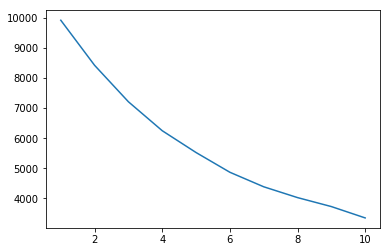

In [32]:
plt.plot(list_num_clusters, inertia)

In [39]:
X_scaled.shape

(1416, 7)

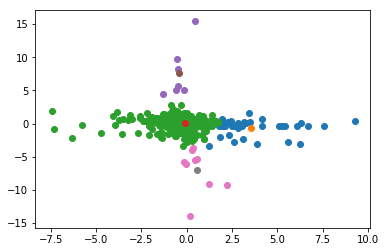

In [52]:
X_short = metrics[['Alpha','Beta']]
X_short_scaled = scale.fit_transform(X_short)
km = KMeans(n_clusters = 4)
km.fit(X_short_scaled)

for i in range(4):
    plt.scatter(X_short_scaled[km.labels_==i, 0], X_short_scaled[km.labels_==i, 1])
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1])

In [47]:
scale = StandardScaler()
X = scale.fit_transform(metrics)

In [48]:
db = DBSCAN(eps=0.15, min_samples=3)
db.fit(X)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=None, p=None)